# Notebook for McKinsey Hackathon 18-11-2017

<img src="crisp.jpeg" alt="Drawing" style="width: 600px;"/>

# Problem Statement

Mission

You are working with the government to transform your city into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.
 
The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

# Challenge

Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months.

Your task 
To predict traffic patterns in each of these four junctions for the next 4 months.

# data extraction

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train_aWnotuB.csv')
#data

# definitions, exploration & quality

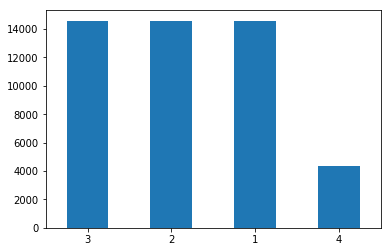

In [3]:
junction_hist = data['Junction'].value_counts()
junction_hist.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

In [179]:
df = data.copy()
df = pd.DataFrame(df['DateTime'].str.split(' ').tolist(), columns = ['Date','Time'])
df = pd.concat([data, df], axis=1)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.time
#df

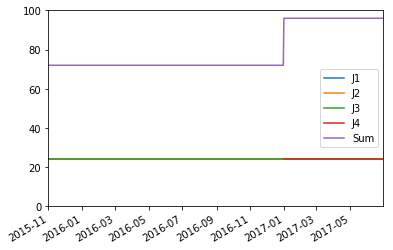

In [5]:
df[df['Junction']==1]['Date'].value_counts().plot(label='J1')
df[df['Junction']==2]['Date'].value_counts().plot(label='J2')
df[df['Junction']==3]['Date'].value_counts().plot(label='J3')
df[df['Junction']==4]['Date'].value_counts().plot(label='J4')
df['Date'].value_counts().plot(ylim=[0,100], label='Sum')
plt.legend()
plt.show()


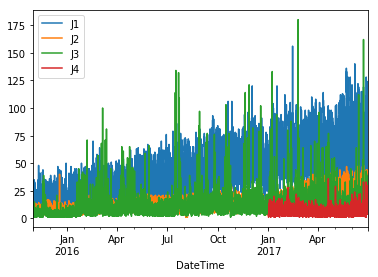

In [6]:
fig, ax = plt.subplots(1, 1)
df[df['Junction']==1].plot(x='DateTime', y='Vehicles', ax=ax, label='J1')
df[df['Junction']==2].plot(x='DateTime', y='Vehicles', ax=ax, label='J2')
df[df['Junction']==3].plot(x='DateTime', y='Vehicles', ax=ax, label='J3')
df[df['Junction']==4].plot(x='DateTime', y='Vehicles', ax=ax, label='J4')
plt.show()

Traffic on junctions 1-4

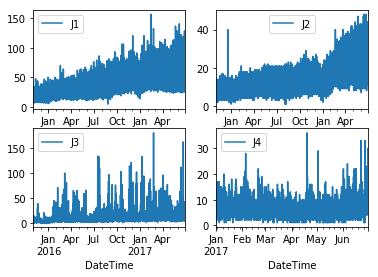

In [7]:
fig, ax = plt.subplots(2, 2)
df[df['Junction']==1].plot(x='DateTime', y='Vehicles', ax=ax[0,0], label='J1')
df[df['Junction']==2].plot(x='DateTime', y='Vehicles', ax=ax[0,1], label='J2')
df[df['Junction']==3].plot(x='DateTime', y='Vehicles', ax=ax[1,0], label='J3')
df[df['Junction']==4].plot(x='DateTime', y='Vehicles', ax=ax[1,1], label='J4')
plt.show()

Traffic on junctions 1-4 averaged by day

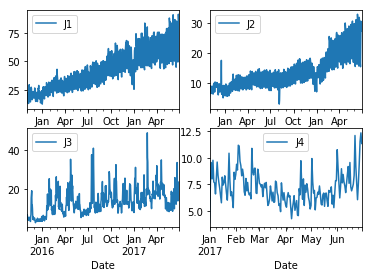

In [8]:
fig, ax = plt.subplots(2, 2)
df[df['Junction']==1].pivot_table(index='Date').plot(y='Vehicles', ax=ax[0,0], label='J1')
df[df['Junction']==2].pivot_table(index='Date').plot(y='Vehicles', ax=ax[0,1], label='J2')
df[df['Junction']==3].pivot_table(index='Date').plot(y='Vehicles', ax=ax[1,0], label='J3')
df[df['Junction']==4].pivot_table(index='Date').plot(y='Vehicles', ax=ax[1,1], label='J4')
plt.show()

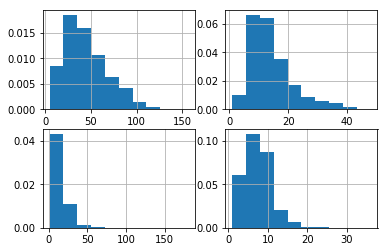

In [9]:
fig, ax = plt.subplots(2, 2)
df.loc[df['Junction']==1, 'Vehicles'].hist(normed=True, ax=ax[0,0], label='J1')
df.loc[df['Junction']==2, 'Vehicles'].hist(normed=True, ax=ax[0,1], label='J2')
df.loc[df['Junction']==3, 'Vehicles'].hist(normed=True, ax=ax[1,0], label='J3')
df.loc[df['Junction']==4, 'Vehicles'].hist(normed=True, ax=ax[1,1], label='J4')
plt.show()

In [115]:
import scipy
print('scipy: %s' % scipy.__version__)
import numpy
print('numpy: %s' % numpy.__version__)
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import sklearn
print('sklearn: %s' % sklearn.__version__)
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.0
statsmodels: 0.8.0


# Validation test

In [10]:
data = pd.read_csv('train_aWnotuB.csv', parse_dates=['DateTime'], index_col='DateTime')
junc = data.loc[data['Junction']==4, 'Vehicles']
split_point = int(len(junc)*0.9)
dataset, validation = junc[0:split_point], junc[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 3909, Validation 435


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

test = [1,1,1,1]
predictions = [1.3,1,2,1]
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 0.522


In [254]:
model = ARIMA(X, order=(5,1,1))
model.fit()
print(model.summary())

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train_aWnotuB.csv', parse_dates=['DateTime'])
dates = data.loc[data['Junction']==4]['DateTime'].values
vehicles = data.loc[data['Junction']==4]['Vehicles'].values

split_point = int(len(dates)*0.9)

dates_train, vehicles_train, dates_val, vehicles_val  = dates[0:split_point], vehicles[0:split_point], dates[split_point:], vehicles[split_point:]

dates = list(dates)
vehicles = list(vehicles)
dates_train = list(dates_train)
vehicles_train = list(vehicles_train)
dates_val = list(dates_val)
vehicles_val = list(vehicles_val)

In [40]:
df = data.loc[data['Junction']==4]
df = df.copy()
df = df.drop('ID', axis=1)
df = df.drop('Junction', axis=1)

In [115]:
df = data.loc[data['Junction']==4]
df = df.copy()
df = df.drop('ID', axis=1)
df = df.drop('Junction', axis=1)

import numpy as np
from sklearn.svm import SVR

# define function for create N lags
def create_lags(df, N):
    for i in range(N):
        df['Lag' + str(i+1)] = df.Vehicles.shift(i+1)
    return df

# create 4 lags
df = create_lags(df,5)

# the first 4 hours will have missing values. can't use them.
df = df.dropna()

# create X and y
y = df.Vehicles.values
X = df.iloc[:, 1:].values

# Train on 90% of the data
train_idx = int(len(df) * .9)

# create train and test data
X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[train_idx:]

# fit and predict
clf = SVR(kernel= 'rbf', C= 20, gamma= 0.1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

test = y_test
predictions = predicted
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 3.127


In [174]:
df_pred = pd.DataFrame(df_pred, columns=['Vehicles'])
#df_pred = pd.concat([df.iloc[train_idx:,0],df_pred], axis=1)
df_pred = create_lags(df_pred,5)
df_pred = df_pred.dropna()
df_pred

,Vehicles,Lag1,Lag2,Lag3,Lag4,Lag5
5,3.390064,4.428926,9.092496,8.106687,10.869840,11.052131
6,3.083689,3.390064,4.428926,9.092496,8.106687,10.869840
7,5.602079,3.083689,3.390064,4.428926,9.092496,8.106687
8,6.420074,5.602079,3.083689,3.390064,4.428926,9.092496
9,6.965504,6.420074,5.602079,3.083689,3.390064,4.428926
10,3.595869,6.965504,6.420074,5.602079,3.083689,3.390064
11,8.077610,3.595869,6.965504,6.420074,5.602079,3.083689
12,7.026132,8.077610,3.595869,6.965504,6.420074,5.602079
13,7.978857,7.026132,8.077610,3.595869,6.965504,6.420074
14,10.071439,7.978857,7.026132,8.077610,3.595869,6.965504


In [176]:


X_pred = df_pred.values

predicted_2 = clf.predict(X_pred)
predicted_2

array([  3.48836931,   3.11594096,   5.62291603,   6.59766994,
         6.96876169,   3.59368886,   8.0150017 ,   7.02931279,
         7.95059663,  10.11351866,   9.2563845 ,  12.07101938,
         9.91205114,  15.13836217,  11.1928724 ,  13.50024967,
        11.6659656 ,   9.5379305 ,  10.18921606,   9.92741891,
         9.32394218,   6.97097484,   6.12702405,   6.13944071,
         4.22353196,   3.25421563,   4.95985984,   2.95743418,
         4.94049896,   8.02292711,   5.83653514,   5.59674021,
        11.77120665,  10.56316175,  10.47307725,  10.16384484,
         9.96243362,   9.86678312,   9.82036237,   9.89389226,
         9.67834378,  16.04288354,  13.29528021,  10.02353529,
         8.02337769,  10.04068711,   6.56588945,   6.03824255,
         7.07873393,   4.85698751,   6.8296954 ,   5.95156031,
         2.9519571 ,   7.1660435 ,  11.3269519 ,  10.58110296,
        11.49975773,   9.72188559,  10.86929367,   7.89872521,
         8.15221401,   6.82518635,   8.97646134,   5.76

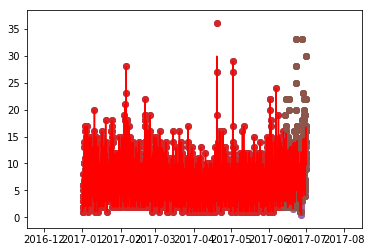

In [121]:
dates=df.iloc[:,0].values
dates_test=df.iloc[train_idx:,0].values
dates = np.reshape(dates,(len(dates), 1))
plt.scatter(dates, y)
plt.scatter(dates_test, predicted)
plt.scatter(dates_test, y_test)
plt.plot(dates, clf.predict(X), color= 'red', label= 'RBF model')
plt.show()

In [133]:
from datetime import date, datetime, timedelta

addition_datetime = []

def datetime_range(start, end, delta):
    current = start
    if not isinstance(delta, timedelta):
        delta = timedelta(**delta)
    while current < end:
        yield current
        current += delta


start = datetime(2015,1,1)
end = datetime(2015,1,3)

#this unlocks the following interface:
for dt in datetime_range(start, end, {'days': 0, 'hours':1}):
    addition_datetime.append(dt)

In [134]:
addition_datetime

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 1, 1, 0),
 datetime.datetime(2015, 1, 1, 2, 0),
 datetime.datetime(2015, 1, 1, 3, 0),
 datetime.datetime(2015, 1, 1, 4, 0),
 datetime.datetime(2015, 1, 1, 5, 0),
 datetime.datetime(2015, 1, 1, 6, 0),
 datetime.datetime(2015, 1, 1, 7, 0),
 datetime.datetime(2015, 1, 1, 8, 0),
 datetime.datetime(2015, 1, 1, 9, 0),
 datetime.datetime(2015, 1, 1, 10, 0),
 datetime.datetime(2015, 1, 1, 11, 0),
 datetime.datetime(2015, 1, 1, 12, 0),
 datetime.datetime(2015, 1, 1, 13, 0),
 datetime.datetime(2015, 1, 1, 14, 0),
 datetime.datetime(2015, 1, 1, 15, 0),
 datetime.datetime(2015, 1, 1, 16, 0),
 datetime.datetime(2015, 1, 1, 17, 0),
 datetime.datetime(2015, 1, 1, 18, 0),
 datetime.datetime(2015, 1, 1, 19, 0),
 datetime.datetime(2015, 1, 1, 20, 0),
 datetime.datetime(2015, 1, 1, 21, 0),
 datetime.datetime(2015, 1, 1, 22, 0),
 datetime.datetime(2015, 1, 1, 23, 0),
 datetime.datetime(2015, 1, 2, 0, 0),
 datetime.datetime(2015, 1, 2, 1, 0)

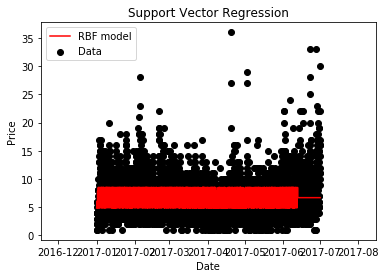

In [22]:
import numpy as np
from sklearn.svm import SVR

dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1
dates_train = np.reshape(dates_train,(len(dates_train), 1)) # converting to matrix of n X 1
dates_val = np.reshape(dates_val,(len(dates_val), 1)) # converting to matrix of n X 1

svr_rbf = SVR(kernel= 'rbf', C= 1.8, gamma= 0.1) # defining the support vector regression models
svr_rbf.fit(dates_train, vehicles_train) # fitting the data points in the models

plt.scatter(dates, vehicles, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# SVR RBF model

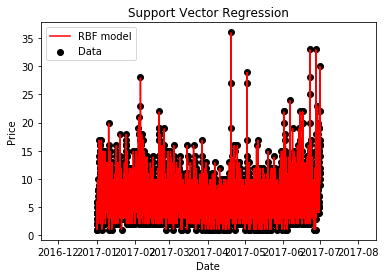

In [3]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


def predict_traffic(dates, vehicles, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_rbf.fit(dates, vehicles) # fitting the data points in the models
    
    
    plt.scatter(dates, vehicles, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0] #, svr_poly.predict(x)[0], svr_lin.predict(x)[0] 

predicted_price = predict_traffic(dates, vehicles, 12) 

In [39]:
predicted_price

7.9136563876652781

# Send Test

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('test_BdBKkAj.csv')
test['Junction'].value_counts()

4    2952
3    2952
2    2952
1    2952
Name: Junction, dtype: int64

In [183]:
test_send = test.copy()

In [211]:
# third easiest solution possible - mean values from the 90th percentile + some predictions for Junction 4

for j in range(1,5):    
    dump = 0
    junc = df[df['Junction']==j]
    percintile90 = int(len(junc)*0.9)
    dump = junc[percintile90:]['Vehicles'].mean()
    test_send.loc[test_send['Junction'] == j, 'Vehicles'] = dump
    #print(dump)
for i in range(8856, 8856+len(predicted_2)):
    test_send.loc[i, 'Vehicles']=predicted_2[i-8856]
test_send.loc[test_send['Junction'] == 4, 'Vehicles']
test_send.to_csv('test_BdBKkAj.csv')

In [208]:
predicted_2[0]

3.4883693058644907

In [137]:
# second easiest solution possible - median values from the 90th percentile

for j in range(1,5):    
    dump = 0
    junc = df[df['Junction']==j]
    percintile90 = int(len(junc)*0.9)
    dump = junc[percintile90:]['Vehicles'].median()
    test_send.loc[test_send['Junction'] == j, 'Vehicles'] = dump
    print(dump)
test_send.to_csv('test_BdBKkAj.csv')
test_send

66.5
24.0
14.0
8.0


,DateTime,Junction,ID,Vehicles
0,2017-07-01 00:00:00,1,20170701001,66.5
1,2017-07-01 01:00:00,1,20170701011,66.5
2,2017-07-01 02:00:00,1,20170701021,66.5
3,2017-07-01 03:00:00,1,20170701031,66.5
4,2017-07-01 04:00:00,1,20170701041,66.5
5,2017-07-01 05:00:00,1,20170701051,66.5
6,2017-07-01 06:00:00,1,20170701061,66.5
7,2017-07-01 07:00:00,1,20170701071,66.5
8,2017-07-01 08:00:00,1,20170701081,66.5
9,2017-07-01 09:00:00,1,20170701091,66.5


In [111]:
# easiest solution possible - mean values from the 90th percentile

for j in range(1,5):    
    dump = 0
    junc = df[df['Junction']==j]
    percintile90 = int(len(junc)*0.9)
    dump = junc[percintile90:]['Vehicles'].mean()
    test_send.loc[test_send['Junction'] == j, 'Vehicles'] = dump
    print(dump)
test_send.to_csv('test_BdBKkAj.csv')
test_send

71.23698630136987
25.311643835616437
15.595890410958905
8.829885057471264


,DateTime,Junction,ID,Vehicles
0,2017-07-01 00:00:00,1,20170701001,71.237
1,2017-07-01 01:00:00,1,20170701011,71.237
2,2017-07-01 02:00:00,1,20170701021,71.237
3,2017-07-01 03:00:00,1,20170701031,71.237
4,2017-07-01 04:00:00,1,20170701041,71.237
5,2017-07-01 05:00:00,1,20170701051,71.237
6,2017-07-01 06:00:00,1,20170701061,71.237
7,2017-07-01 07:00:00,1,20170701071,71.237
8,2017-07-01 08:00:00,1,20170701081,71.237
9,2017-07-01 09:00:00,1,20170701091,71.237


# Final submission

In [226]:
# easiest solution possible - mean values from the 90th percentile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('test_BdBKkAj.csv')

test_send = test.copy()

for j in range(1,5):    
    dump = 0
    junc = df[df['Junction']==j]
    percintile90 = int(len(junc)*0.9)
    dump = junc[percintile90:]['Vehicles'].mean()
    test_send.loc[test_send['Junction'] == j, 'Vehicles'] = dump
    print(dump)
test_send = test_send.drop('DateTime', axis=1)
test_send = test_send.drop('Junction', axis=1)
test_send = test_send.set_index('ID')
test_send.to_csv('final_submission.csv')

71.23698630136987
25.311643835616437
15.595890410958905
8.829885057471264


# Holidays & Test

In [ ]:
from dateutil import rrule
from datetime import datetime

def get_schedule_holidays_rrules():
    return [
        rrule.rrule(rrule.YEARLY, dtstart=datetime.now(), bymonth=1, bymonthday=1),              # New Years
        rrule.rrule(rrule.YEARLY, dtstart=datetime.now(), bymonth=5, byweekday=rrule.MO(-1)),    # Memorial
        rrule.rrule(rrule.YEARLY, dtstart=datetime.now(), bymonth=7, bymonthday=4),              # Independence
        rrule.rrule(rrule.YEARLY, dtstart=datetime.now(), bymonth=11, byweekday=rrule.TH(4)),    # Thanksgiving
        rrule.rrule(rrule.YEARLY, dtstart=datetime.now(), bymonth=12, bymonthday=25),            # Christmas
]

In [58]:
from holidays import holidays

In [61]:
from datetime import date

us_holidays = holidays.UnitedStates()  # or holidays.US()

date(2015, 1, 1) in us_holidays  # True


True

In [62]:
date(2015, 1, 2) in us_holidays  # False

False

In [70]:
holidays_US = []
for date, name in sorted(holidays.US(years=2016).items()):
    holidays_US.append(date)
    print(date, name)
holidays_US

2016-01-01 New Year's Day
2016-01-18 Martin Luther King, Jr. Day
2016-02-15 Washington's Birthday
2016-05-30 Memorial Day
2016-07-04 Independence Day
2016-09-05 Labor Day
2016-10-10 Columbus Day
2016-11-11 Veterans Day
2016-11-24 Thanksgiving
2016-12-25 Christmas Day
2016-12-26 Christmas Day (Observed)


[datetime.date(2016, 1, 1),
 datetime.date(2016, 1, 18),
 datetime.date(2016, 2, 15),
 datetime.date(2016, 5, 30),
 datetime.date(2016, 7, 4),
 datetime.date(2016, 9, 5),
 datetime.date(2016, 10, 10),
 datetime.date(2016, 11, 11),
 datetime.date(2016, 11, 24),
 datetime.date(2016, 12, 25),
 datetime.date(2016, 12, 26)]

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('test_BdBKkAj.csv')
test['Junction'].value_counts()

4    2952
3    2952
2    2952
1    2952
Name: Junction, dtype: int64

In [87]:
test_send = test.copy()

In [106]:
test_send['Vehicles'] = None
test_send[test_send['Junction']==1].loc['Vehicles']=1

C:\Users\PNaF\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
test_send.loc[test_send['Junction'] == 1, 'Vehicles'] = 1

In [110]:
test_send.loc[test_send['Junction'] == 2]

,DateTime,Junction,ID,Vehicles
2952,2017-07-01 00:00:00,2,20170701002,None
2953,2017-07-01 01:00:00,2,20170701012,None
2954,2017-07-01 02:00:00,2,20170701022,None
2955,2017-07-01 03:00:00,2,20170701032,None
2956,2017-07-01 04:00:00,2,20170701042,None
2957,2017-07-01 05:00:00,2,20170701052,None
2958,2017-07-01 06:00:00,2,20170701062,None
2959,2017-07-01 07:00:00,2,20170701072,None
2960,2017-07-01 08:00:00,2,20170701082,None
2961,2017-07-01 09:00:00,2,20170701092,None


In [158]:
test_lenght = pd.read_csv('test_BdBKkAj - kopia.csv', sep=',')

In [160]:
len(test_lenght)

11808

In [164]:
test_lenght['Vehicles']=None
len(test_lenght.loc[test_lenght['Junction']==4])

2952